In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimes=pd.read_csv("/home/hduser/Downloads/crimes.csv")
#crimesTime=pd.read_csv("/home/hduser/Downloads/crimesTime/crimesTime.csv")
#crimes.head(20)

In [3]:
crimesTime=pd.read_csv("/home/hduser/Downloads/crimesTime/crimesTime.csv")
crimes.columns
print(crimesTime.shape)

(507165, 10)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


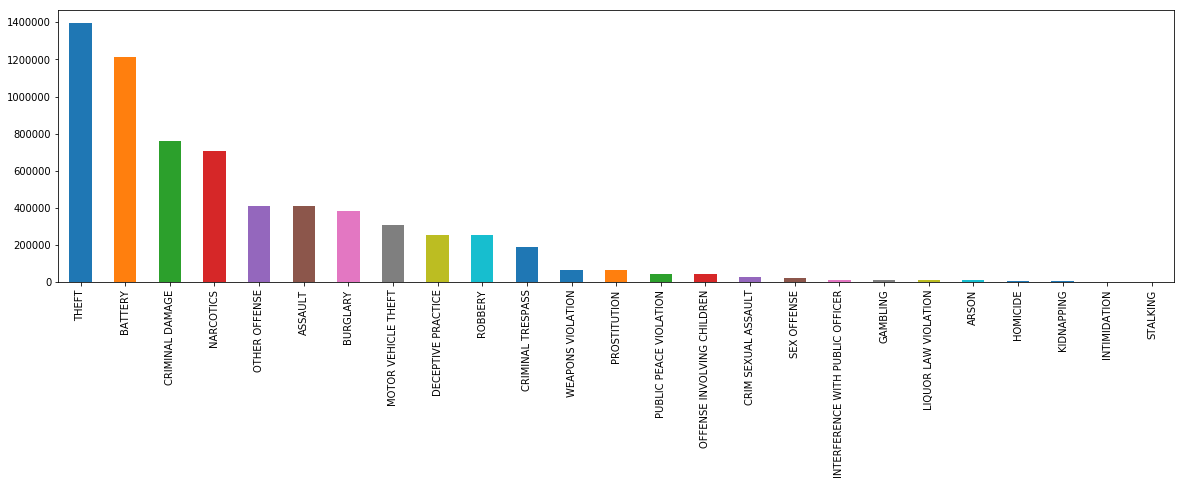

In [3]:
#plotting Primary Type value counts
case_count=crimes["Primary Type"].value_counts()[:25].plot(kind="bar",figsize=(20,5))



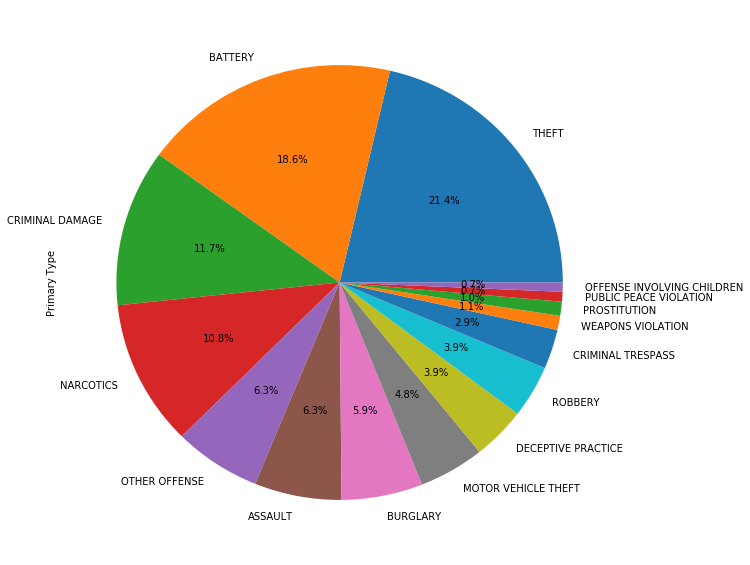

In [24]:
#plotting piechart of share of Primary Types
caseCntPie=crimes["Primary Type"].value_counts()[:15].plot(kind="pie",figsize=(10,10),autopct='%1.1f%%')

Text(0.5,1,'Number of crimes per year')

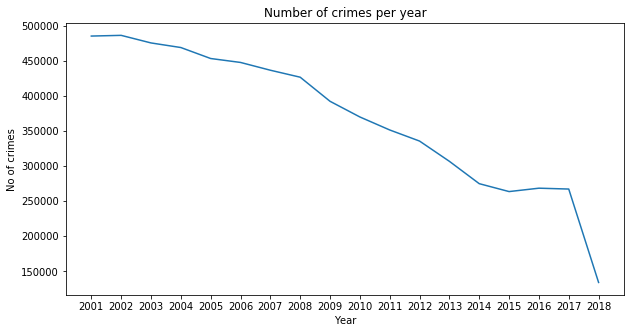

In [37]:
#plotting the crimes commited in each year
crimesYr=crimes.groupby("Year")["ID"].count().plot(figsize=(10,5))
plt.xticks(np.arange(2001,2019,1))
plt.xlabel("Year")
plt.ylabel("No of crimes")
plt.title("Number of crimes per year")


([<matplotlib.axis.YTick at 0x7f2b26357da0>,
 <a list of 12 Text yticklabel objects>)

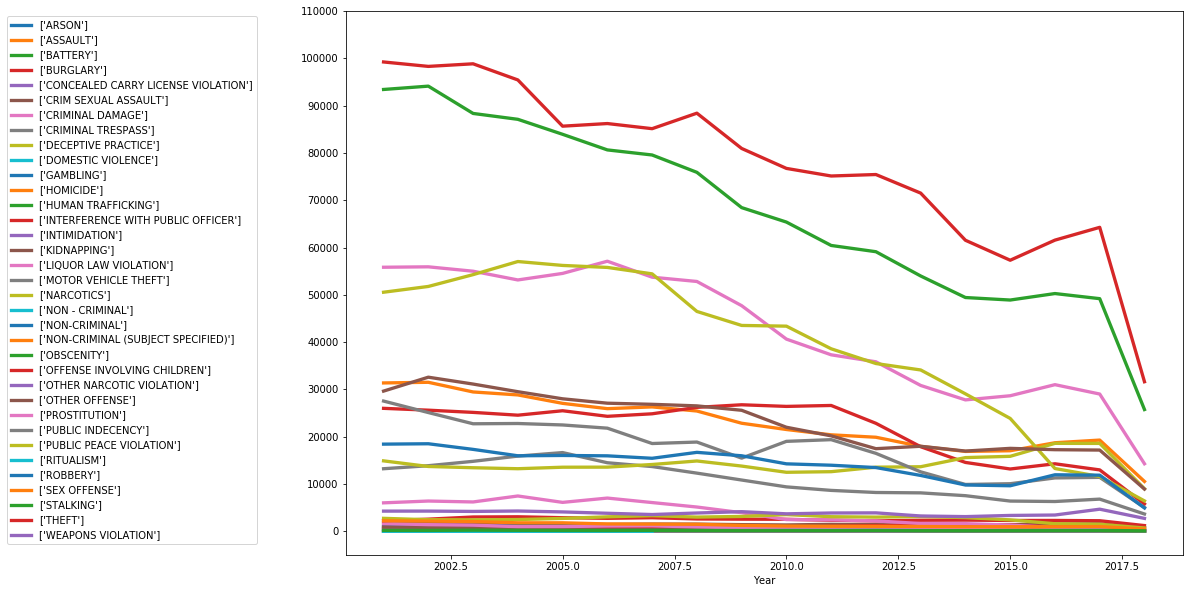

In [25]:
# groupby primary type and year and plotting the number count each year
PrimaryTypes=crimes.groupby(["Primary Type","Year"])["ID"].count().reset_index().rename(columns={"ID":"count"})
fig,ax=plt.subplots()
pnt=PrimaryTypes.groupby("Primary Type")
pnt.plot(x="Year",y="count",ax=ax,legend=False,figsize=(15,10),linewidth=3.3)
plt.legend(pnt["Primary Type"].unique(),loc=1,bbox_to_anchor=(-0.1,1))
plt.yticks(np.arange(0,120000,10000))

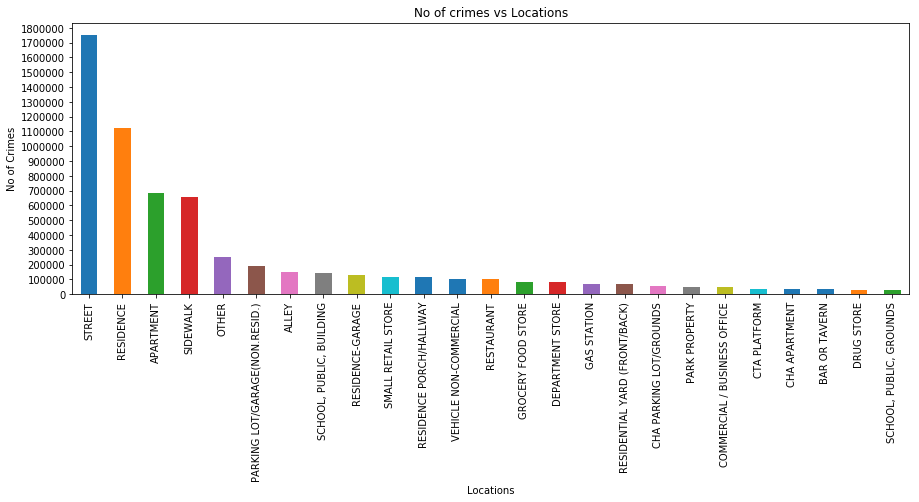

In [24]:
#plotting location description counts
locs=crimes["Location Description"].value_counts()[:25].plot(kind="bar",figsize=(15,5))
plt.ylabel("No of Crimes")
plt.xlabel("Locations")
plt.title("No of crimes vs Locations")
plt.yticks(np.arange(0,1850000,100000))
plt.show()


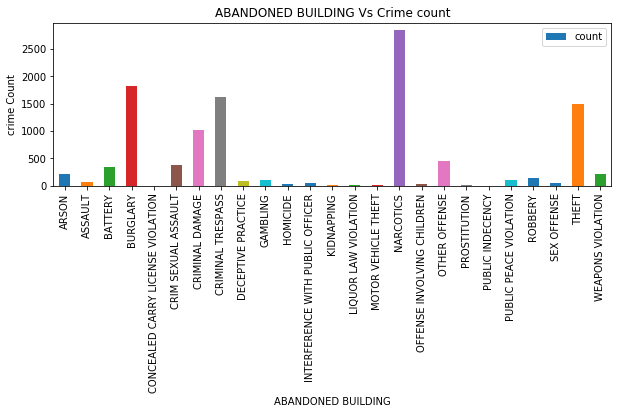

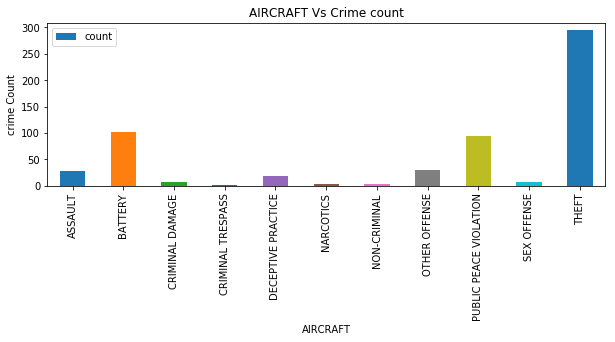

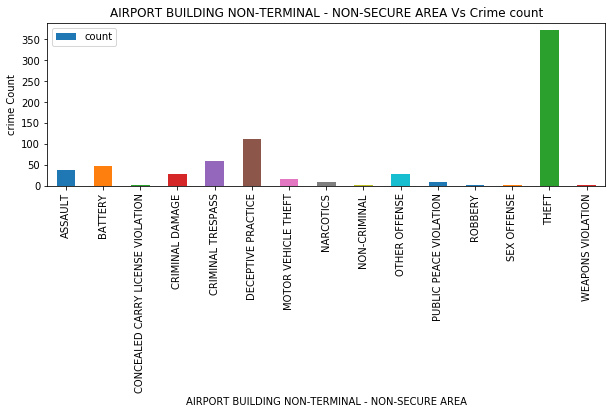

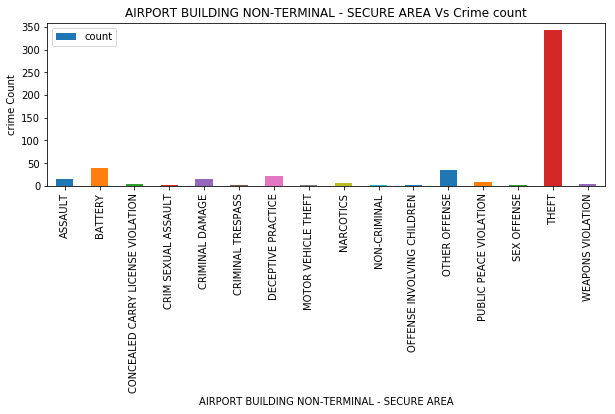

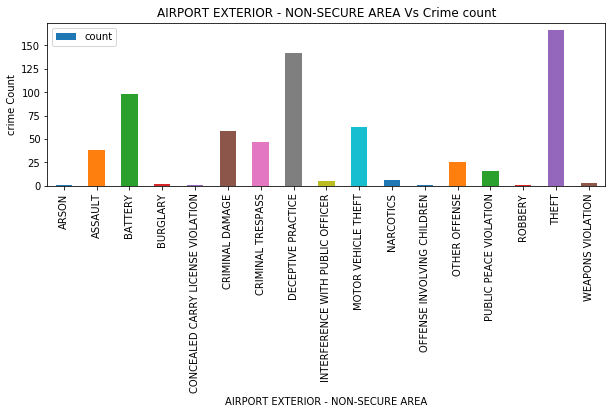

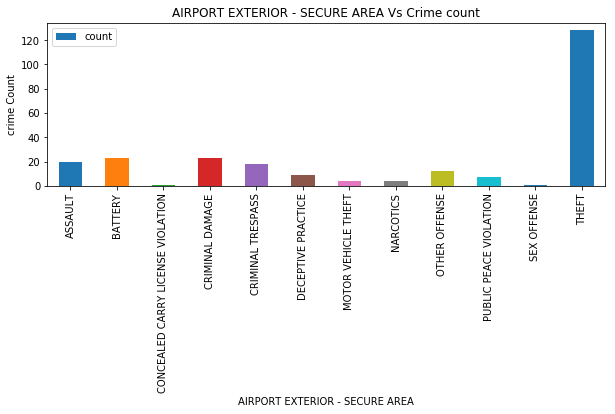

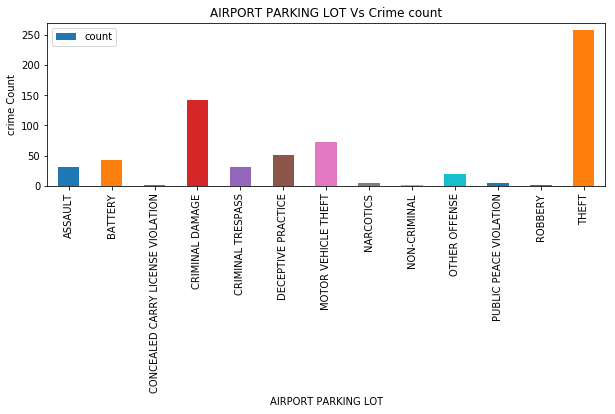

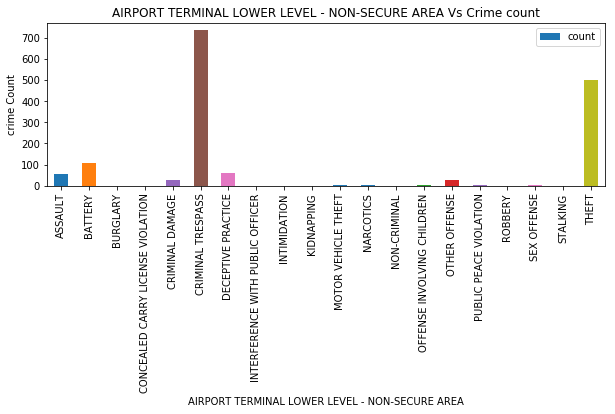

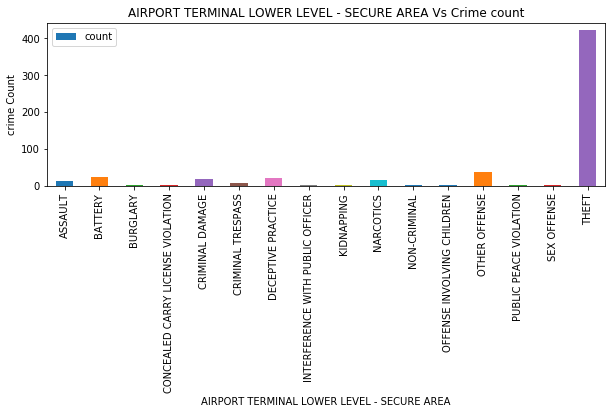

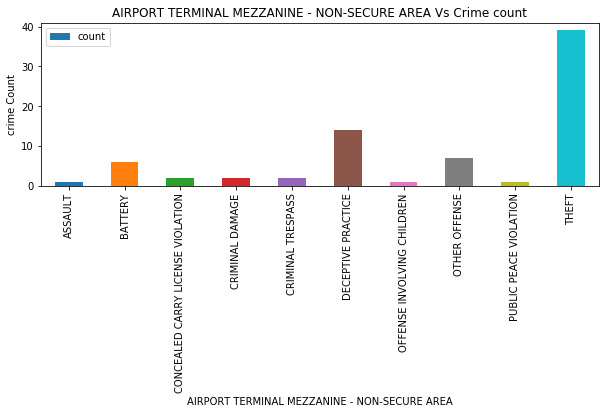

In [42]:
#groupby location and primary type
LocPri=crimes.groupby(["Location Description","Primary Type"])["ID"].count().reset_index().rename(columns={"ID":"count"})
uLoc=LocPri["Location Description"].unique()

for i in range(0,10):
    j=i+1
    LocDesc=LocPri.loc[LocPri["Location Description"]== uLoc[i],["Primary Type","count"]].plot(x="Primary Type",y="count",kind="bar",figsize=(10,3))
    plt.xlabel(uLoc[i])
    plt.ylabel("crime Count")
    plt.title(uLoc[i] + " Vs Crime count")
    plt.show()

([<matplotlib.axis.YTick at 0x7fba50ac0b70>,
 <a list of 9 Text yticklabel objects>)

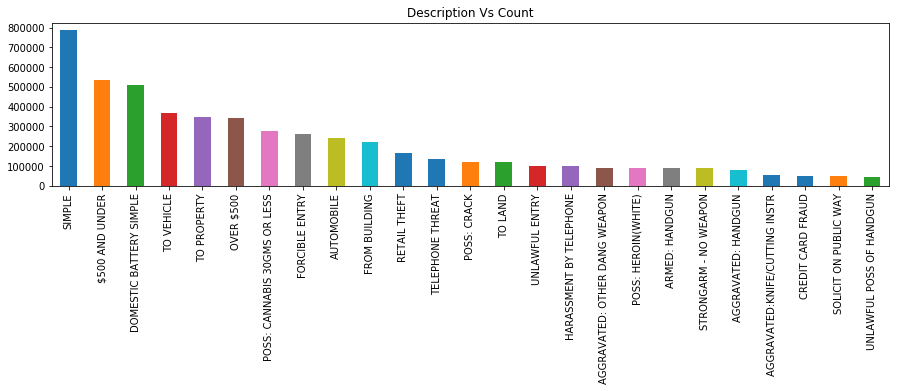

In [79]:
#analyzing description column
desc=crimes["Description"].value_counts()[:25].plot(kind="bar",figsize=(15,3))
plt.title("Description Vs Count")
plt.yticks(np.arange(0,900000,100000))
#print(desc)

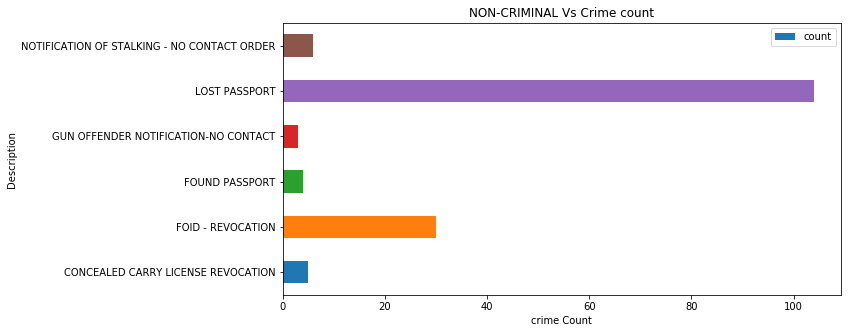

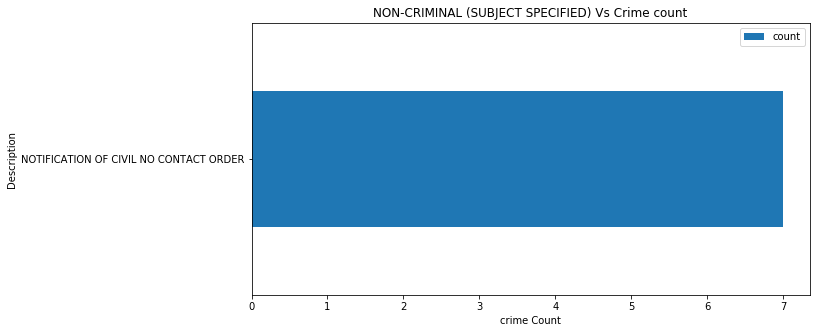

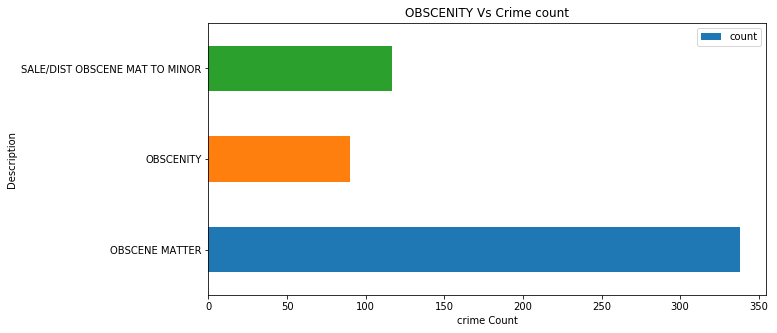

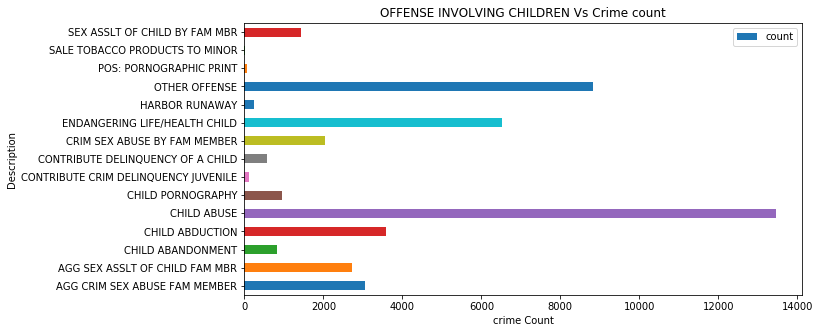

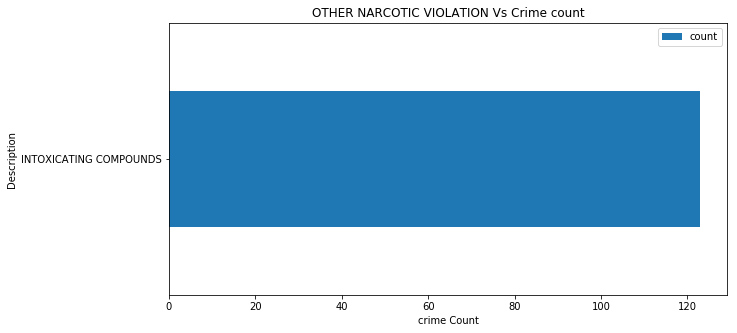

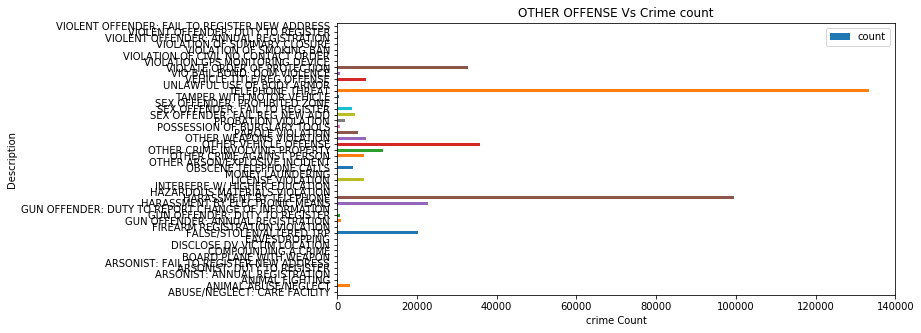

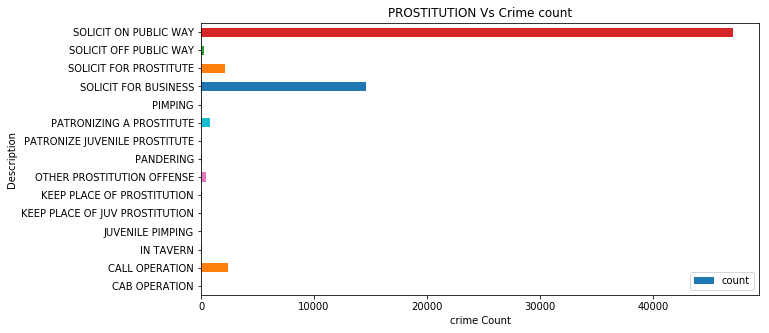

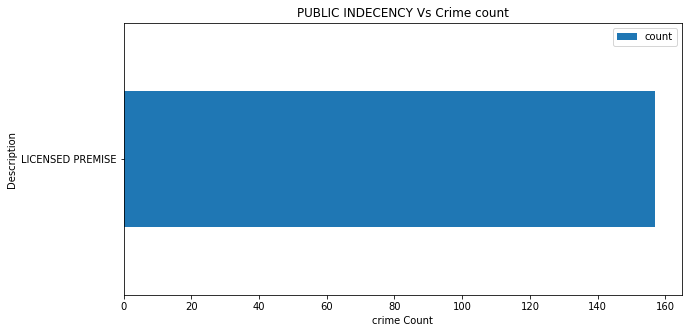

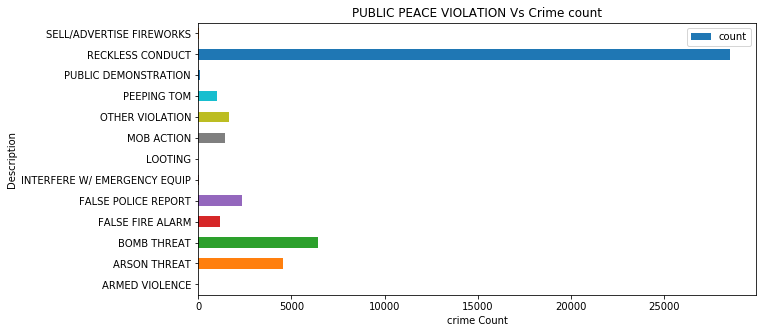

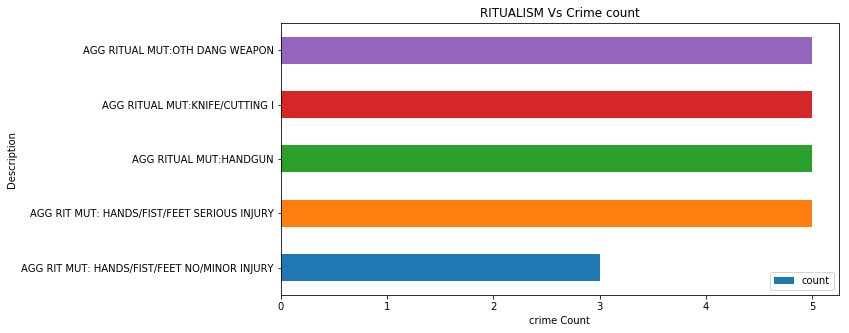

In [74]:
#groupby description and primary type
DescPri=crimes.groupby(["Primary Type","Description"])["ID"].count().reset_index().rename(columns={"ID":"count"})
uDesc=DescPri["Primary Type"].unique()

for i in range(23,30):
    j=i+1
    DescPrim=DescPri.loc[DescPri["Primary Type"]== uDesc[i],["Description","count"]].plot(x="Description",y="count",kind="barh",figsize=(10,15))
    #plt.label(uDesc[i])
    plt.xlabel("crime Count")
    plt.title(uDesc[i] + " Vs Crime count")
    plt.show()

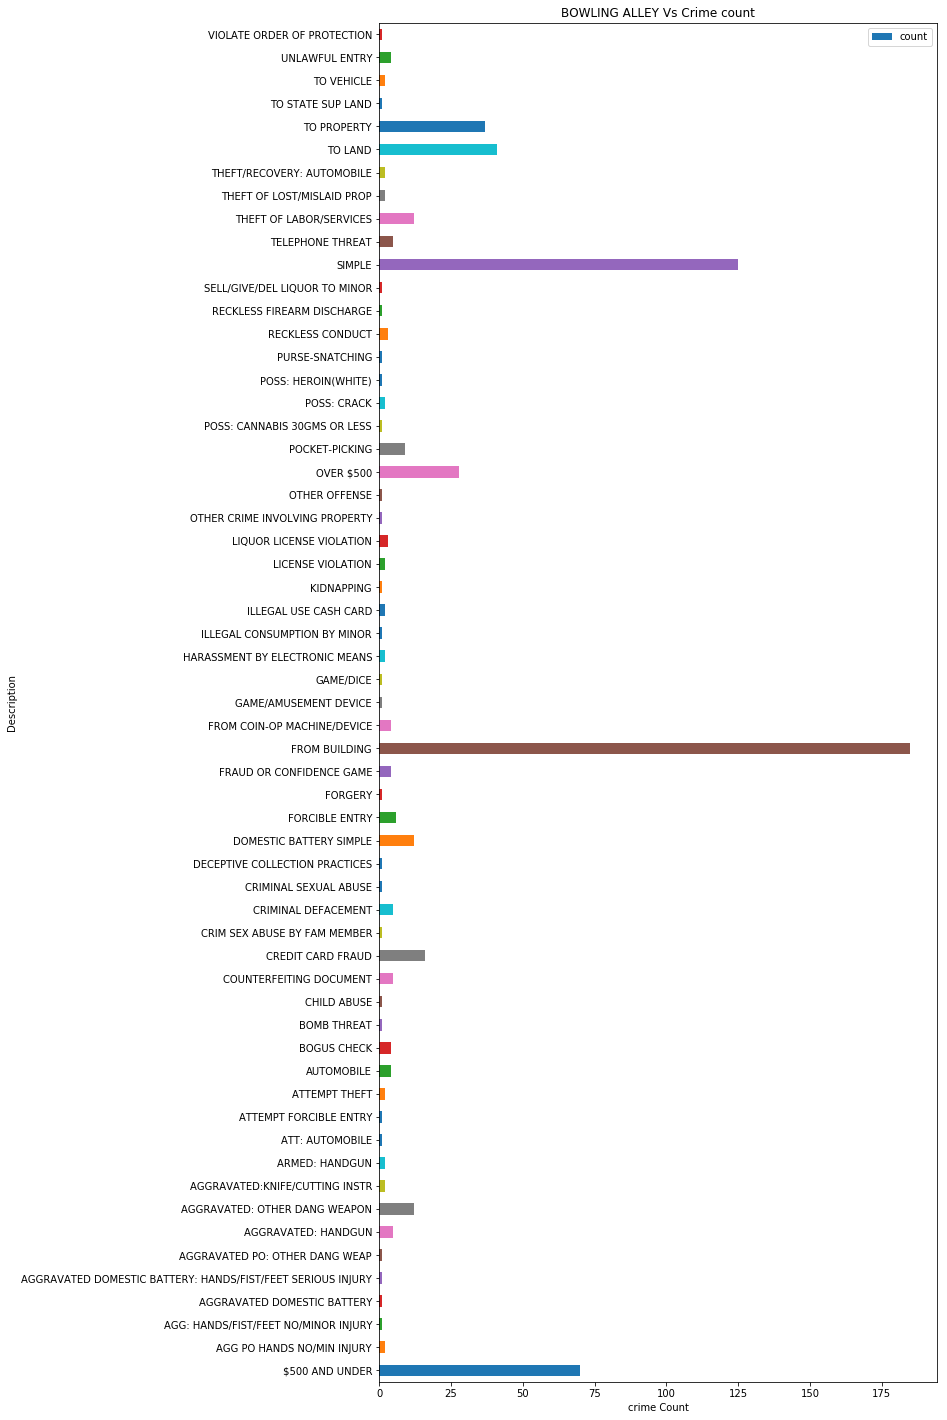

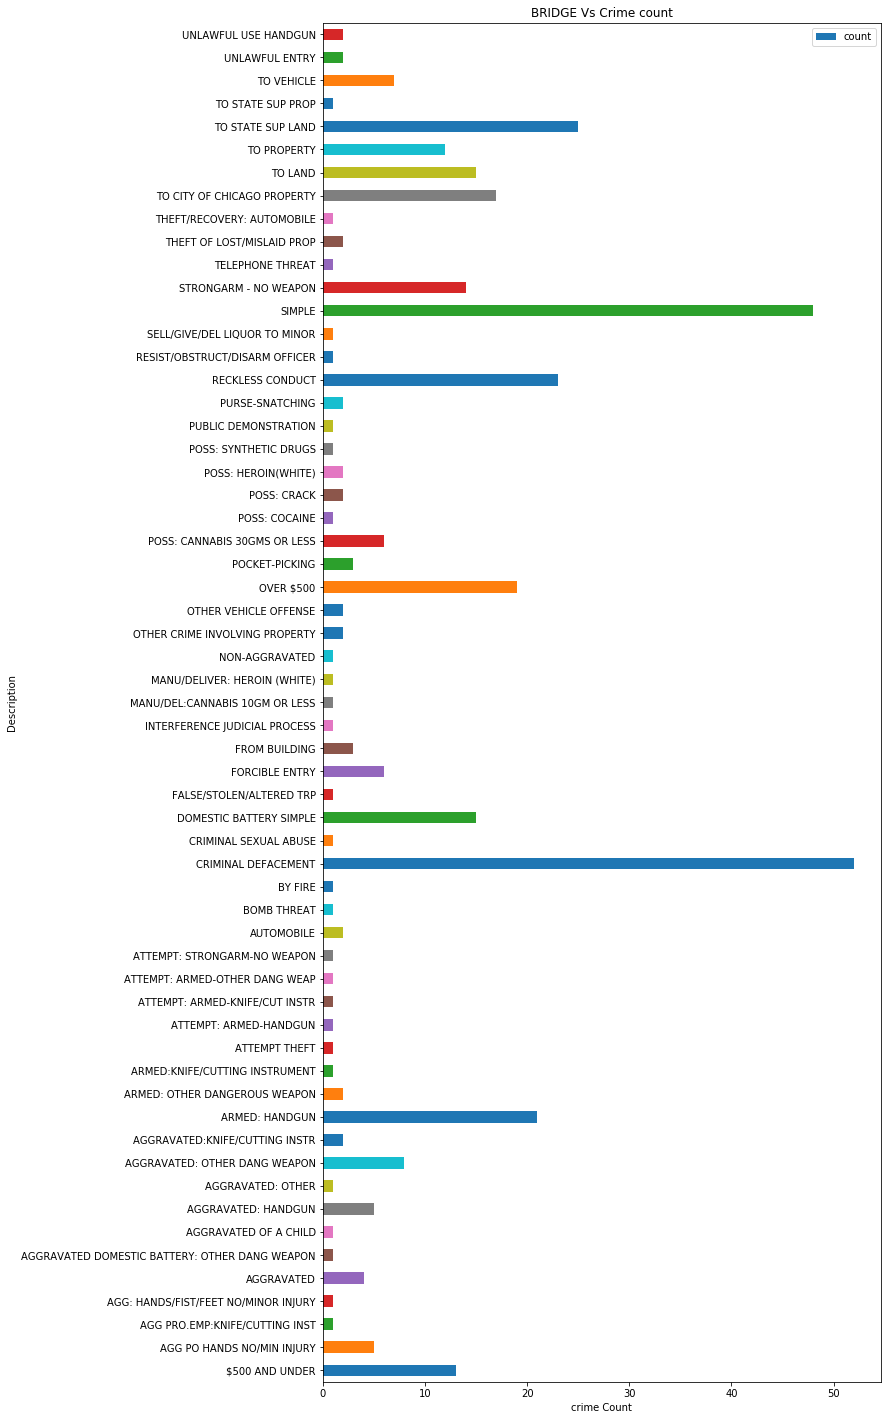

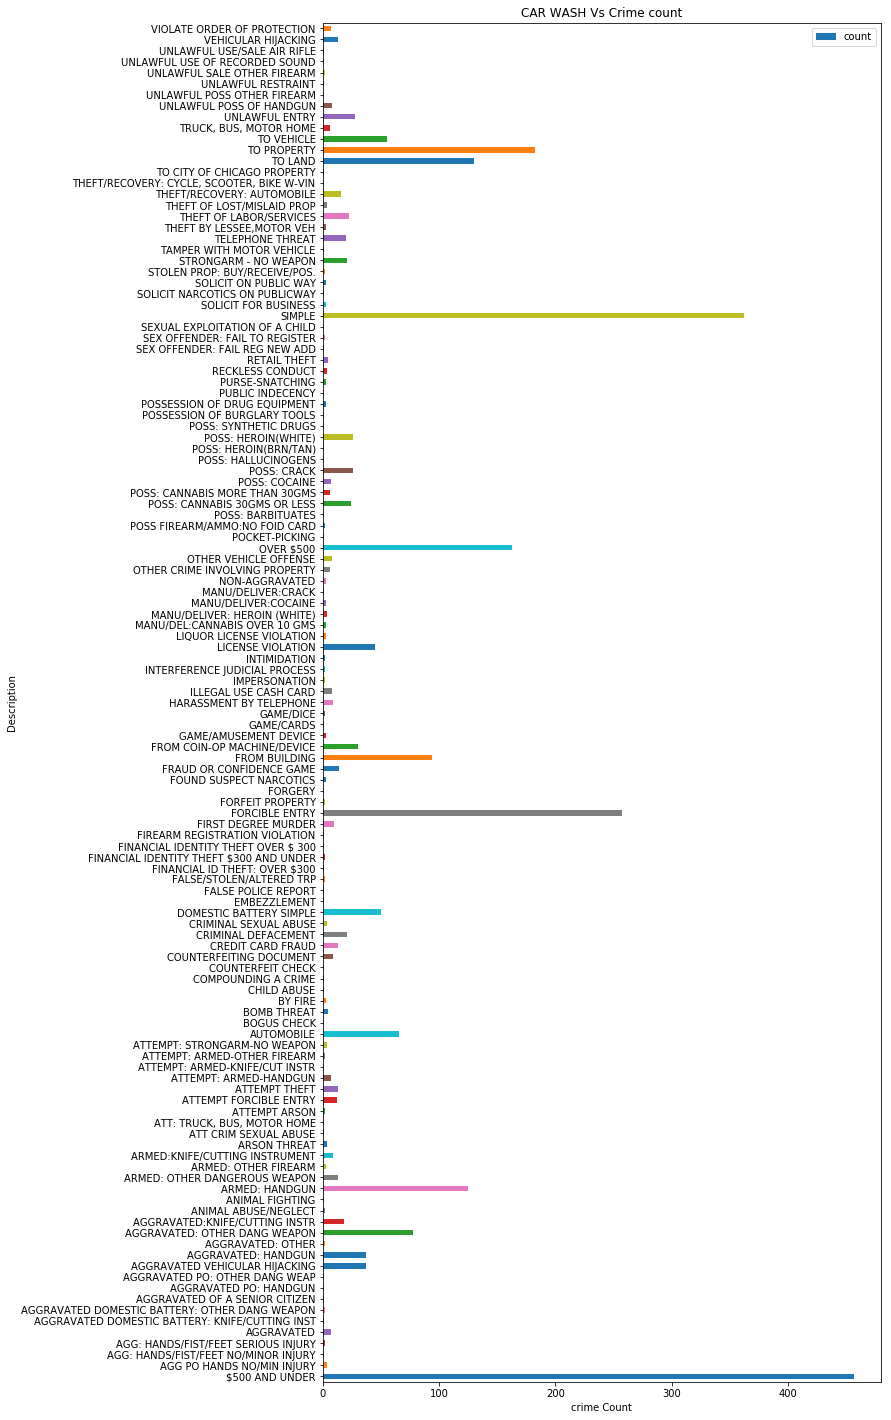

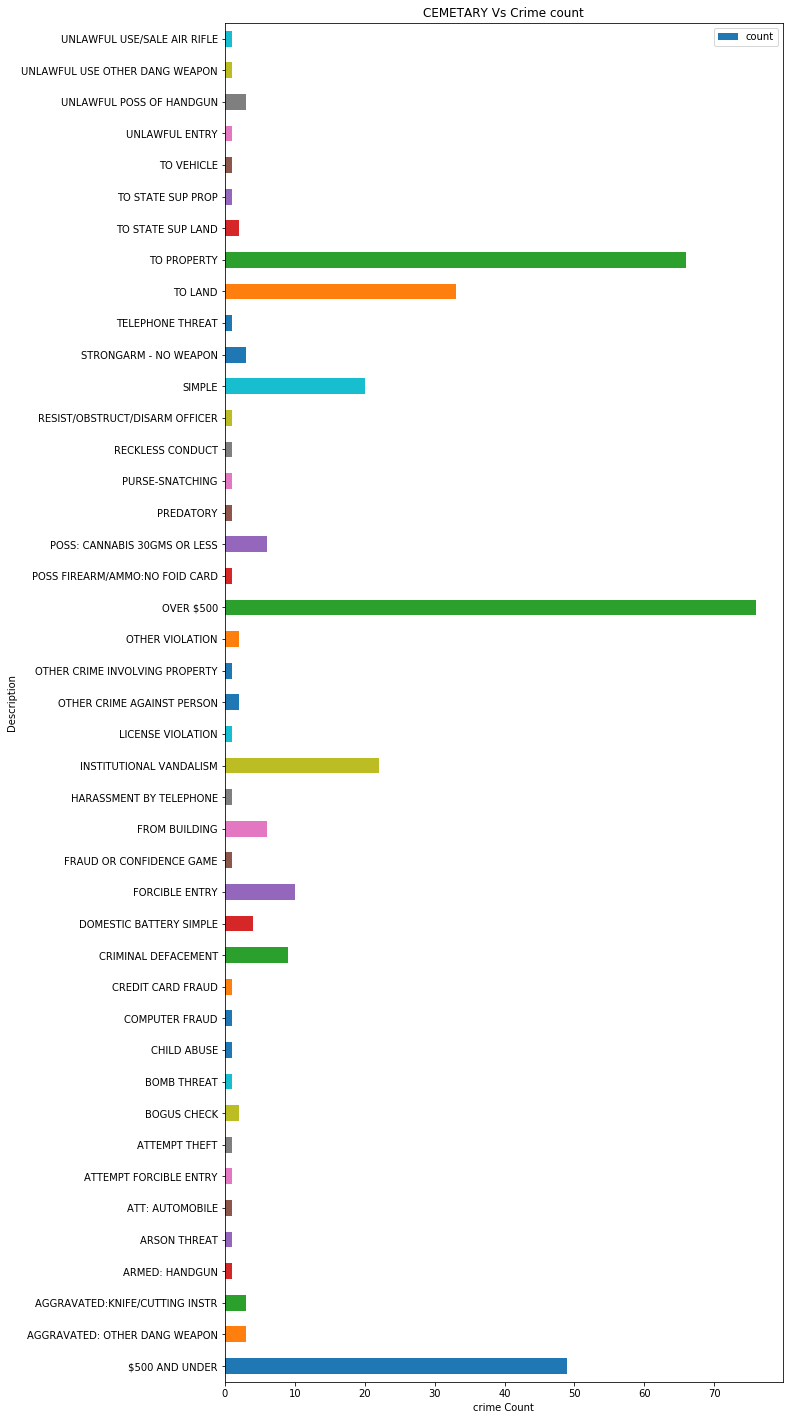

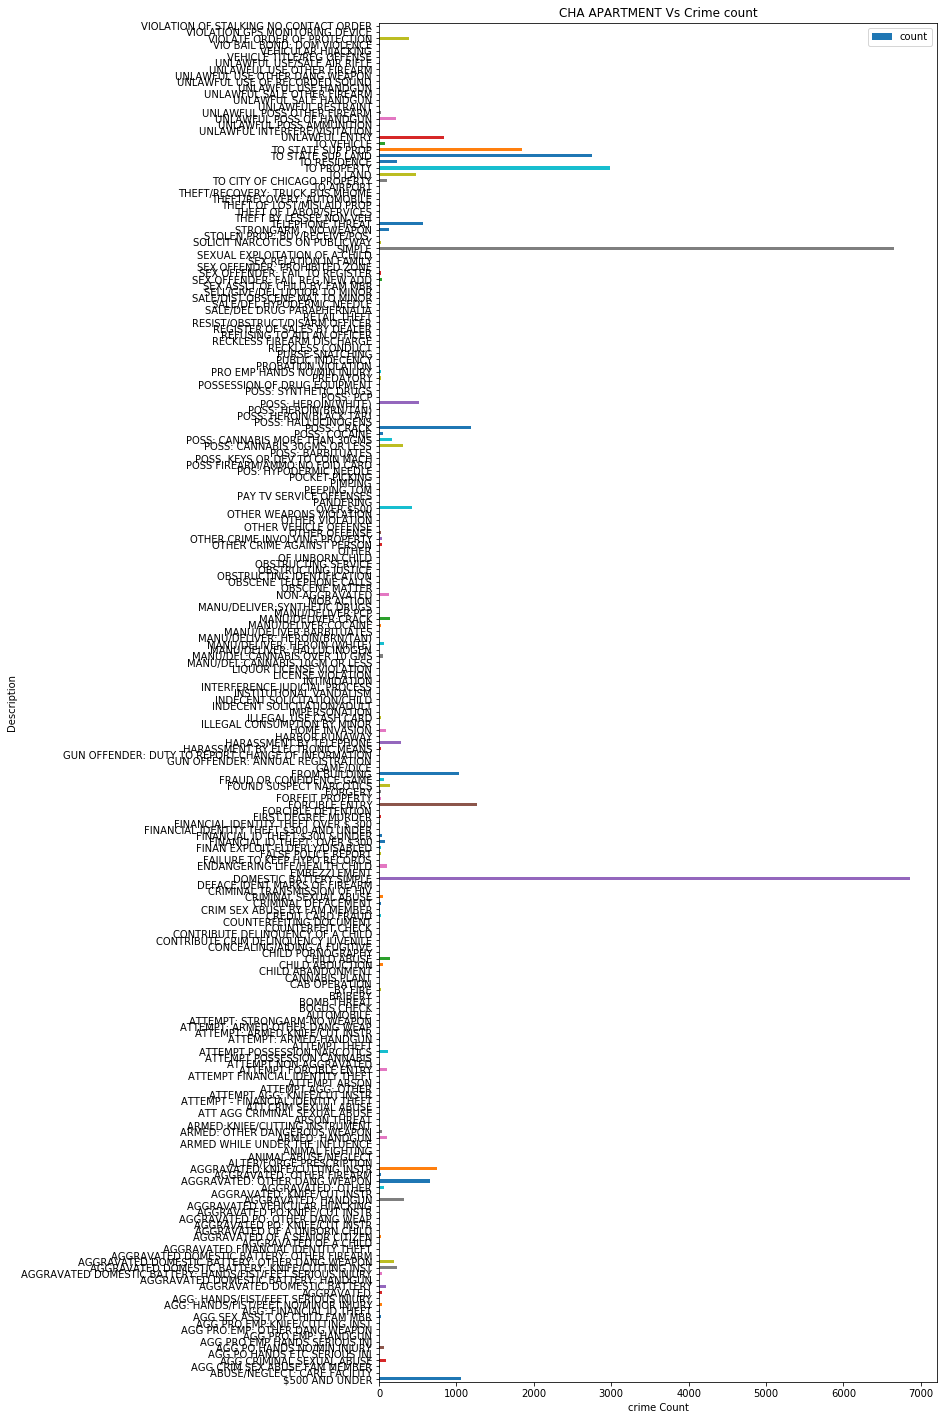

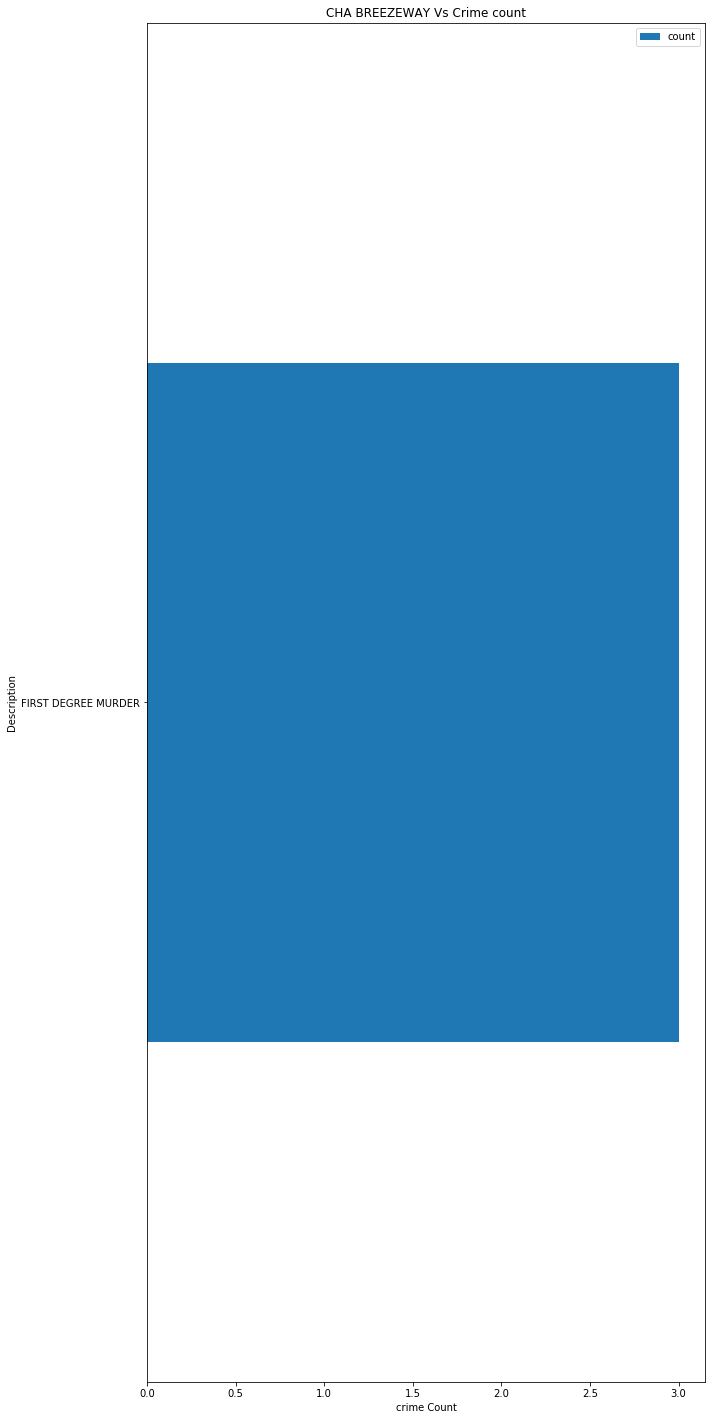

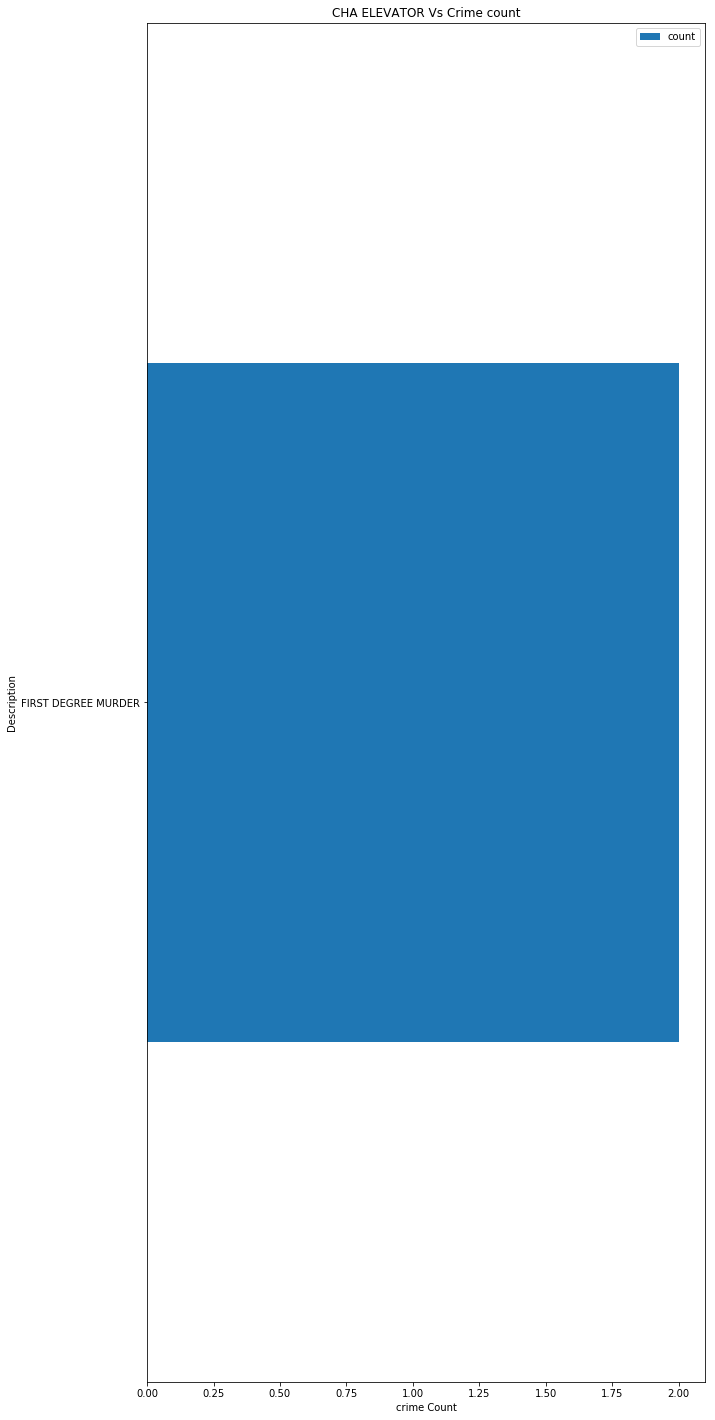

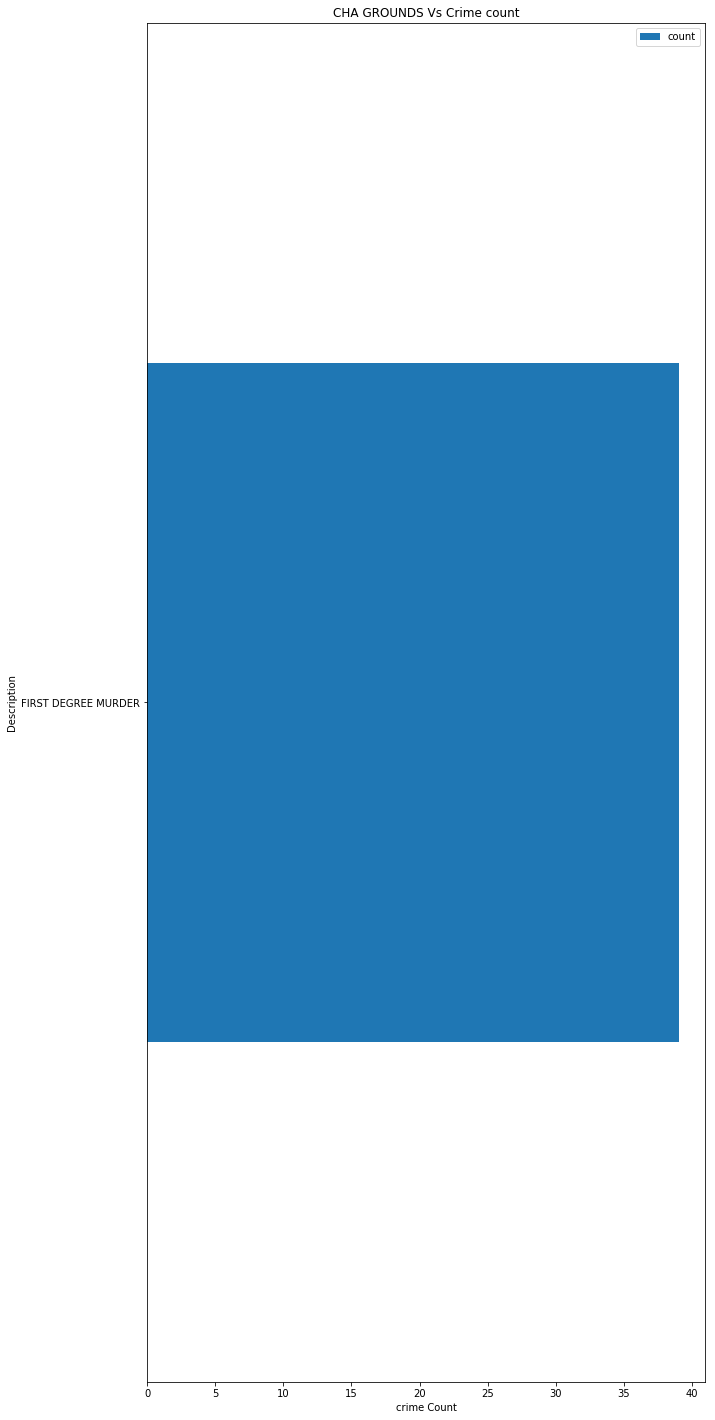

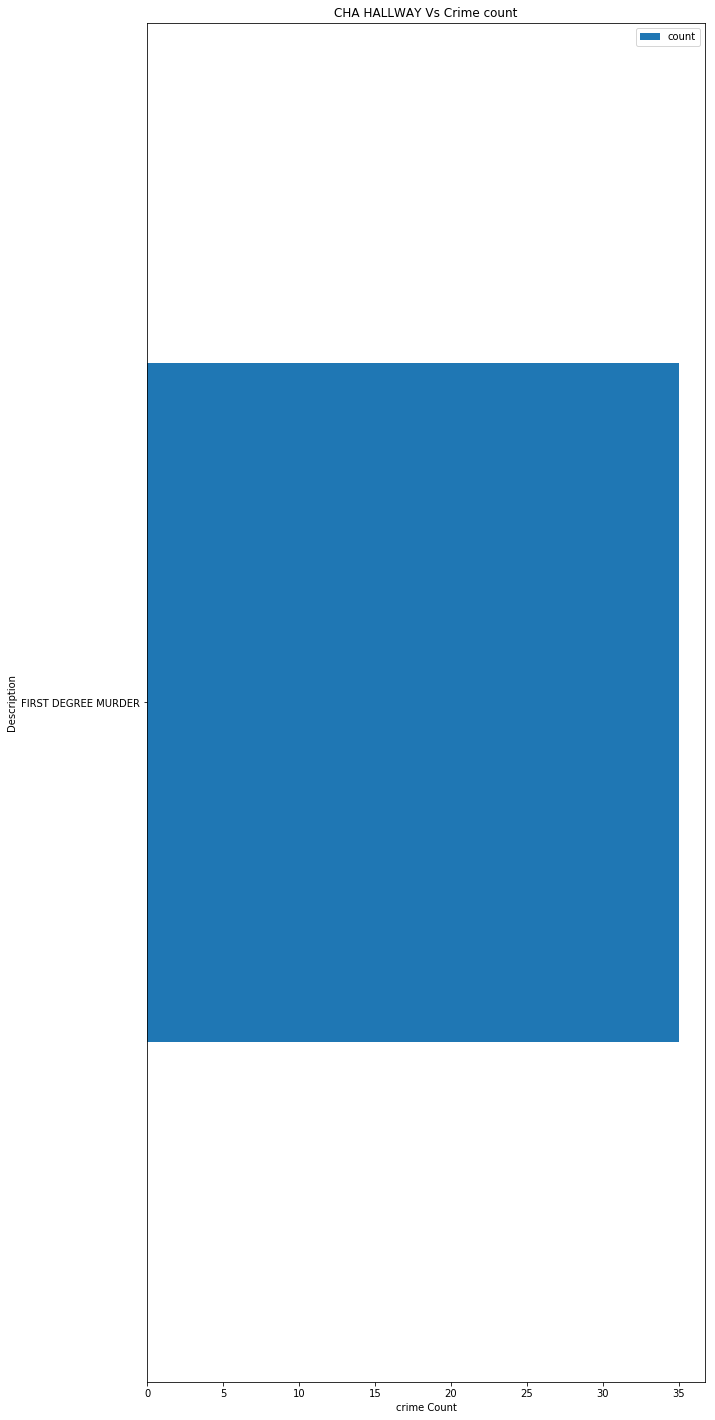

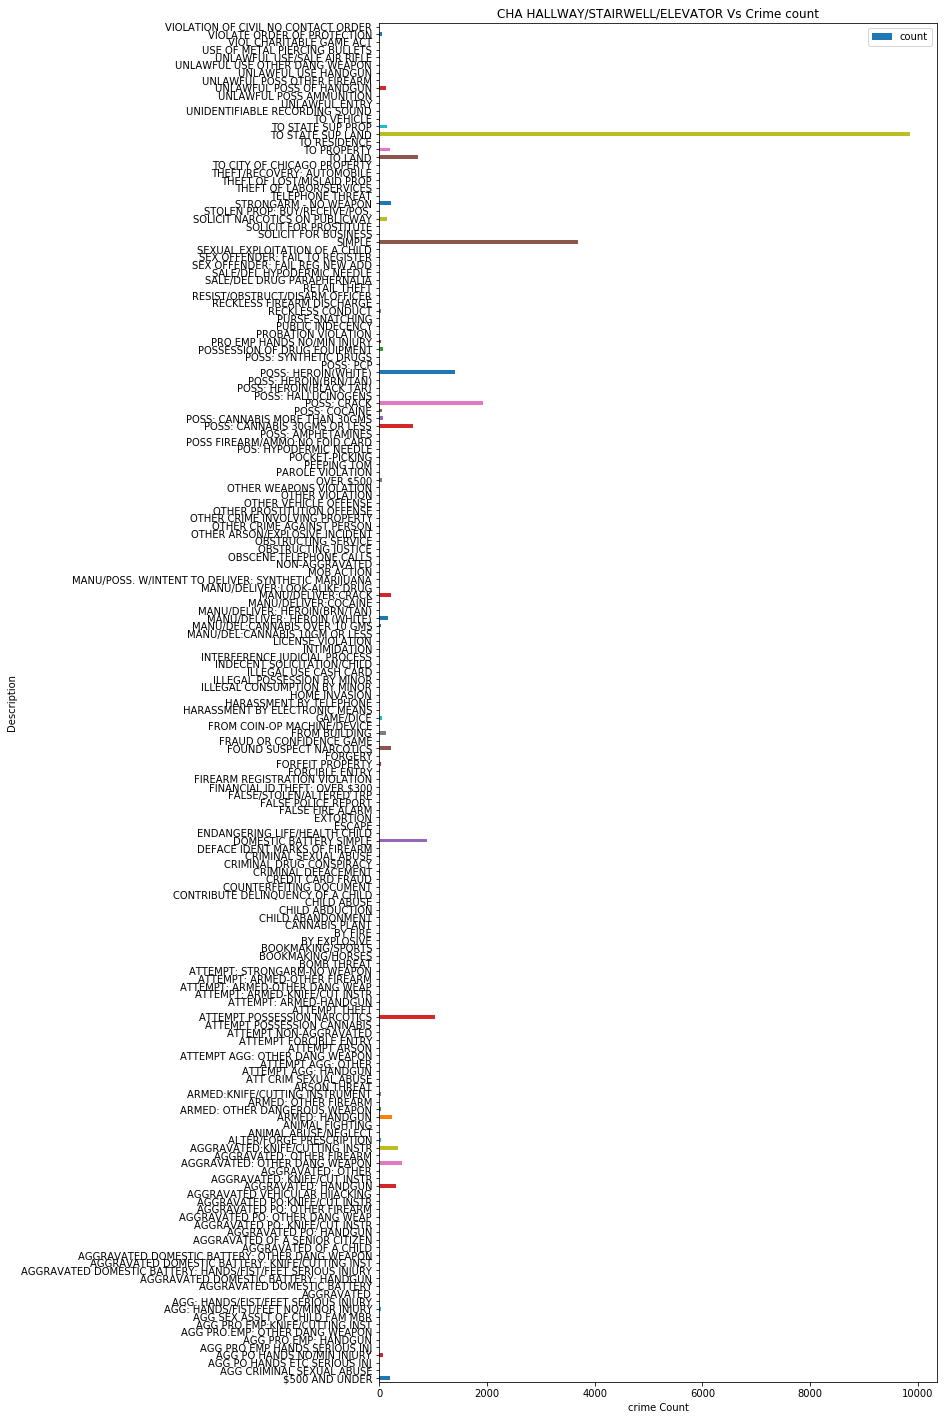

In [9]:
#groupby description and Location Description
LocVsDes=crimes.groupby(["Location Description","Description"])["ID"].count().reset_index().rename(columns={"ID":"count"})
uDesc=LocVsDes["Location Description"].unique()

for i in range(30,40):
    LocVsD=LocVsDes.loc[LocVsDes["Location Description"]== uDesc[i],["Description","count"]].plot(x="Description",y="count",kind="barh",figsize=(10,25))
    #plt.label(uDesc[i])
    plt.xlabel("crime Count")
    plt.title(uDesc[i] + " Vs Crime count")
    plt.show()

([<matplotlib.axis.YTick at 0x7f7b2bae92b0>,
 <a list of 22 Text yticklabel objects>)

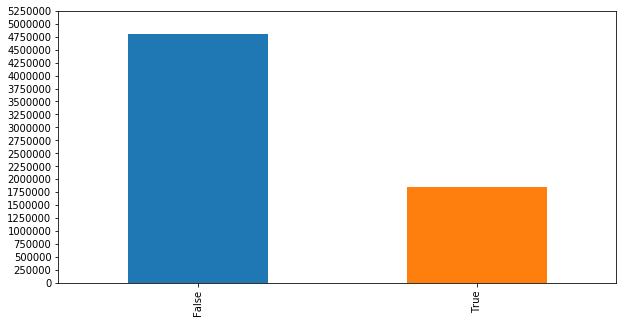

In [8]:
#discussing arrest column
crimes["Arrest"].value_counts().plot(kind="bar",figsize=(10,5))
plt.yticks(np.arange(0,5500000,250000))


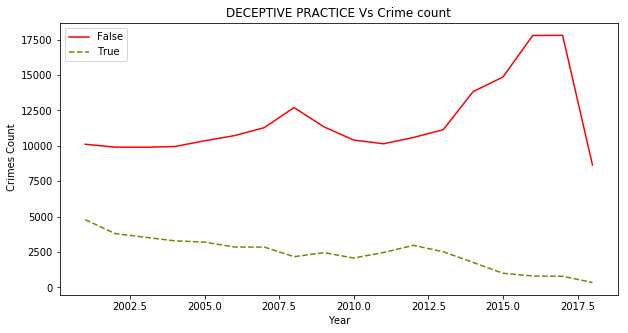

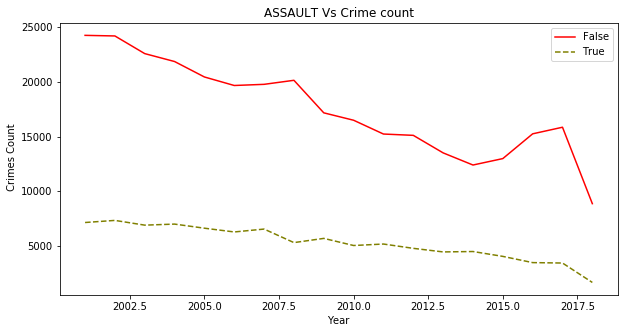

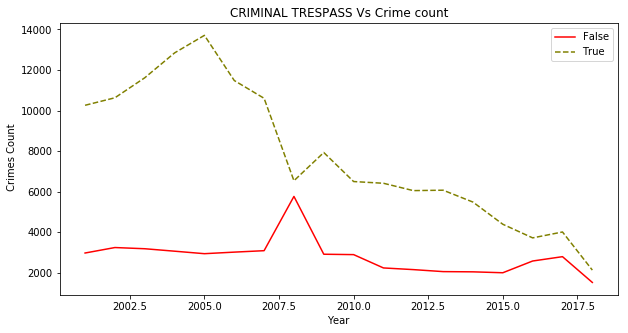

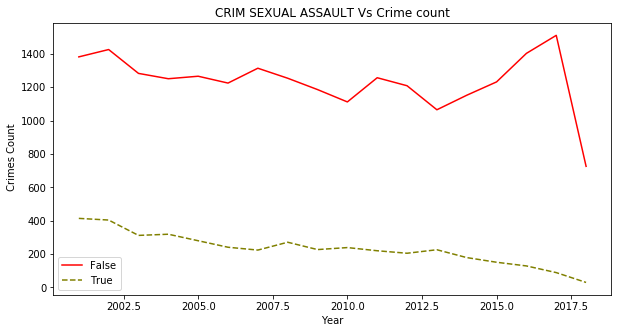

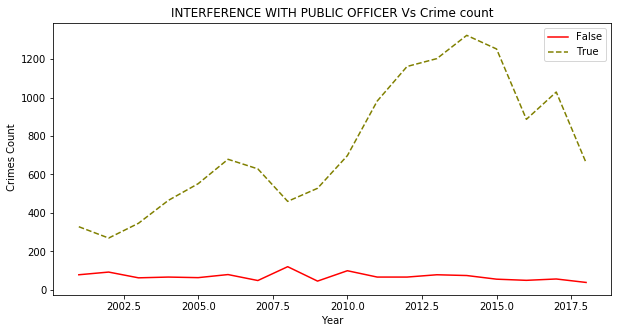

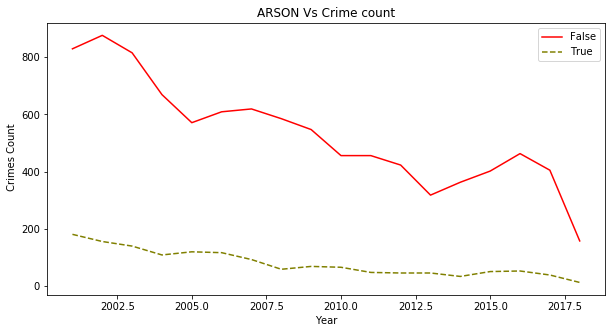

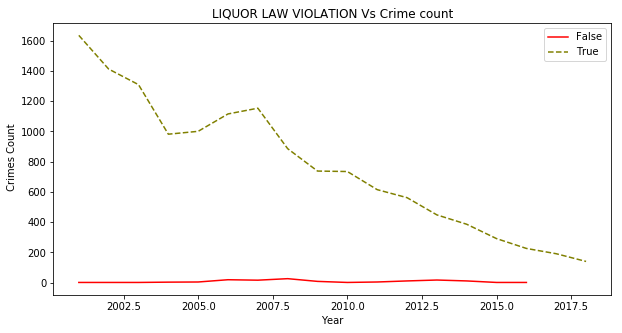

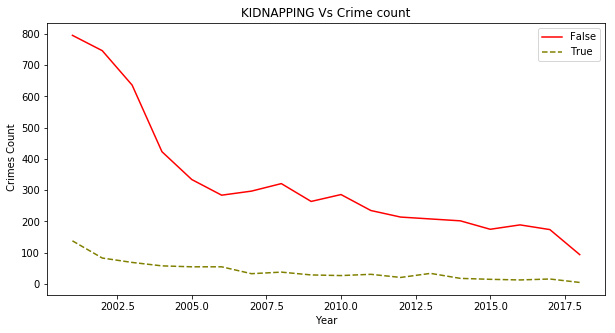

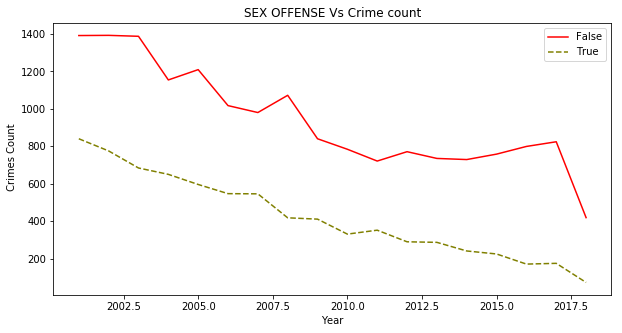

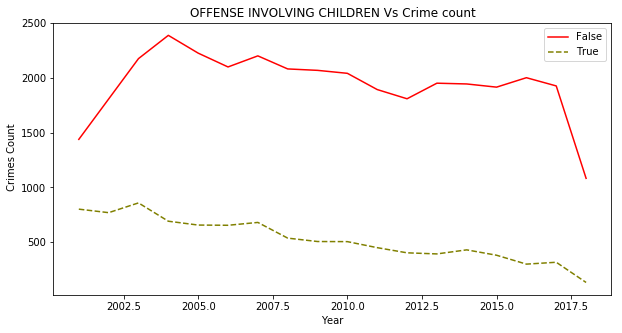

In [88]:
# arrest with primary type
arrPri=crimes.groupby(["Primary Type","Year","Arrest"])["ID"].count().reset_index().rename(columns={"ID":"count"})
#getting unique values of Primary Type
uPri=crimes["Primary Type"].unique()

#plotting Primary Types with years and arrests
for i in range(10,20):
    #getting columns with Primary type and arrest type
    arrFalse=arrPri.loc[(arrPri["Primary Type"]== uPri[i]) & (arrPri.Arrest == False),["count","Year"]]
    arrTrue=arrPri.loc[(arrPri["Primary Type"]== uPri[i]) & (arrPri.Arrest == True),["count","Year"]]
    
    #plotting the graphs
    plt.figure(figsize=(10,5))
    plt.plot(arrFalse["Year"],arrFalse["count"],color="red")
    plt.plot(arrTrue["Year"],arrTrue["count"],color="olive",linestyle="dashed")
    plt.xlabel("Year")
    plt.ylabel(" Crimes Count")
    plt.legend(crimes.Arrest)
    plt.title(uPri[i] + " Vs Crime count")
    plt.show()


In [91]:
#getting date and time using date column
print(type(crimes.Date))

<class 'pandas.core.series.Series'>


            ID      time                Date         Primary Type  \
99    10000284  17:00:00 2015-03-18 17:00:00      CRIMINAL DAMAGE   
105   10000324  07:20:00 2015-03-19 07:20:00              BATTERY   
109   10000346  16:00:00 2015-03-18 16:00:00                THEFT   
270   10000902  10:00:00 2015-03-17 10:00:00   DECEPTIVE PRACTICE   
394   10001191  16:00:00 2015-03-18 16:00:00   DECEPTIVE PRACTICE   
412   10001217  22:00:00 2015-03-18 22:00:00                THEFT   
447   10001269  16:50:00 2015-03-19 16:50:00      CRIMINAL DAMAGE   
617   10001499  20:17:00 2015-03-19 20:17:00    CRIMINAL TRESPASS   
681   10001574  20:30:00 2015-03-19 20:30:00                THEFT   
683   10001576  21:18:00 2015-03-19 21:18:00            NARCOTICS   
722   10001628  22:00:00 2015-03-19 22:00:00  MOTOR VEHICLE THEFT   
813   10001800  13:00:00 2015-03-19 13:00:00              ASSAULT   
814   10001801  06:42:00 2015-03-20 06:42:00              BATTERY   
846   10002031  08:15:00 2015-03-2

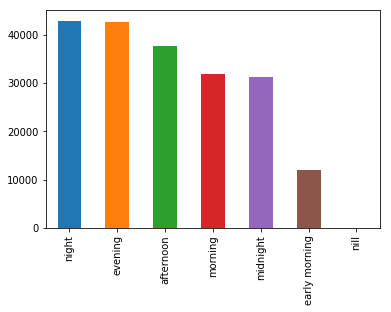

In [27]:
from datetime import datetime as dt
import os

#while starting the kernel and to run the dayTime function for first time comment out the below lines
#making date and time column 

#crimes["Date"]=crimes["Date"].apply(lambda x : dt.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
#crimes["Date"]=pd.to_datetime(crimes["Date"])
#crimes["time"]=crimes["Date"].dt.time

#defining function
def dayTime(time):
    if (time <= dt.time(pd.to_datetime("5:00:00 AM"))):
        return "midnight"
    elif (time > dt.time(pd.to_datetime("5:00:00 AM")) and time <= dt.time(pd.to_datetime("8:00:00 AM"))):
        return "early morning"
    elif (time > dt.time(pd.to_datetime("8:00:00 AM")) and time <= dt.time(pd.to_datetime("12:00:01 PM"))):
        return "morning"
    elif (time > dt.time(pd.to_datetime("12:00:00 PM")) and time <= dt.time(pd.to_datetime("4:00:00 PM"))):
        return "afternoon"
    elif (time > dt.time(pd.to_datetime("4:00:00 PM")) and time <= dt.time(pd.to_datetime("8:00:00 PM"))):
        return "evening"
    elif (time > dt.time(pd.to_datetime("8:00:00 PM")) and time <= dt.time(pd.to_datetime("11:59:00 PM"))):
        return "night"
    else:
        return "nill"

#getting the duration and making new dataframe and save to new csv file

crimesTime=crimes.loc[crimes["District"]==24.0,["ID","time","Date","Primary Type","Description","Location Description","Arrest","District"]]

#comment out below lines for saving the processed Duration column in csv file for first time 

#print(crimesTime["time"])
#crimesTime["time"]=pd.to_datetime(crimesTime["time"])
#crimesTime["time"]=crimesTime["time"].dt.time
#print(crimesTime["time"])

crimesTime["Duration"]=crimesTime["time"].apply(lambda x : dayTime(x))
print(crimesTime.head(20))
path='/home/hduser/Downloads/crimesTime'
crimesTime.to_csv(os.path.join(path,"crimesTime.csv"),mode='a')

#getting the duration analysis
crimesTime["Duration"].value_counts().plot(kind="bar")




[11.  7.  2.  9.  5.  6.  4. 12. 15. 14.  1. 20. 10. 22.  8. 17.  3. 18.
 16. 25. 24. 19. 31. nan 21.]
25


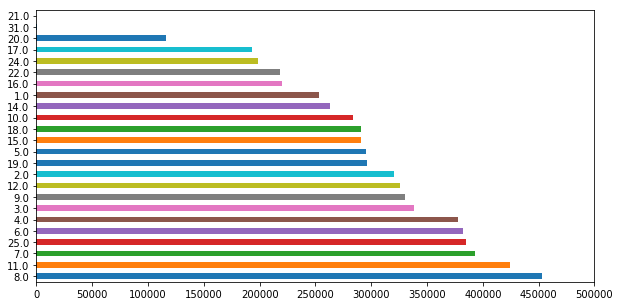

In [13]:
#district column
dist=crimes["District"].value_counts().plot(kind="barh",figsize=(10,5))
plt.xticks(np.arange(0,550000,50000))
udist=crimes["District"].unique()
print(udist)
print(len(udist))

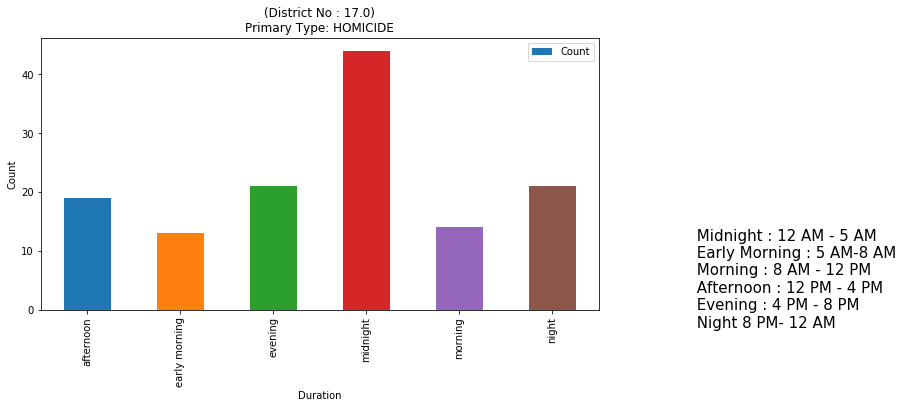

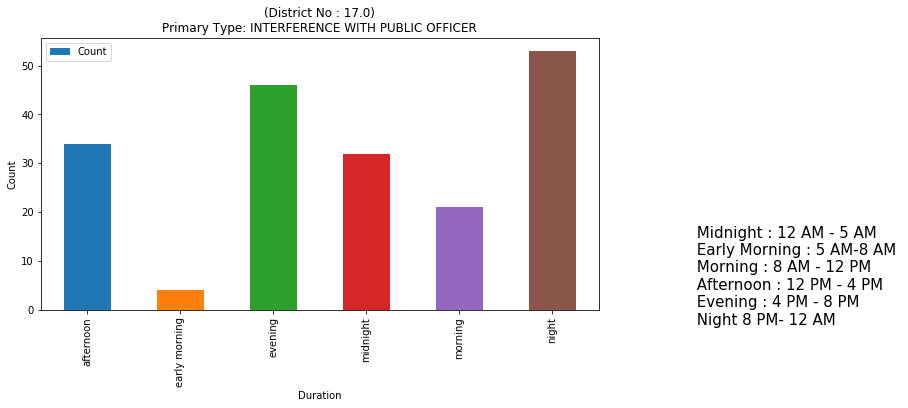

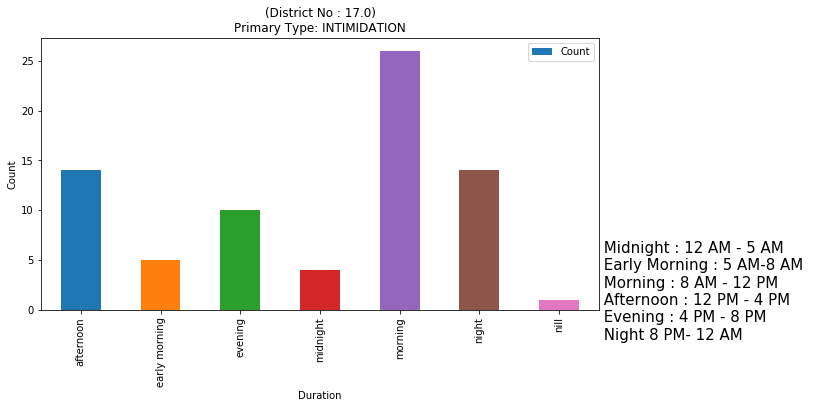

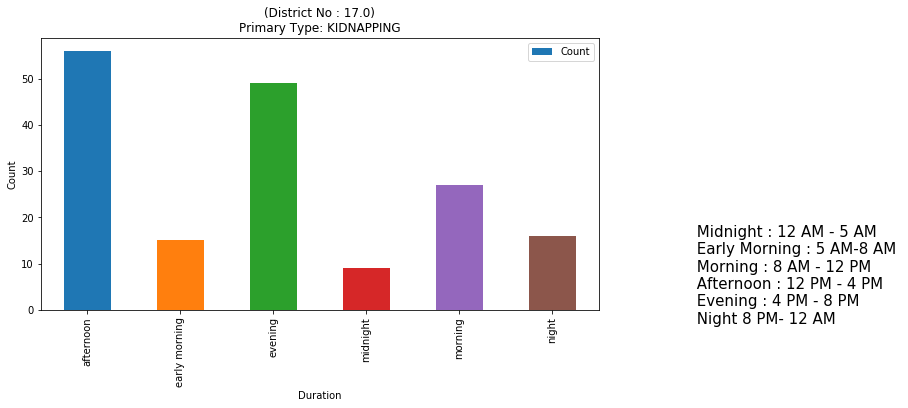

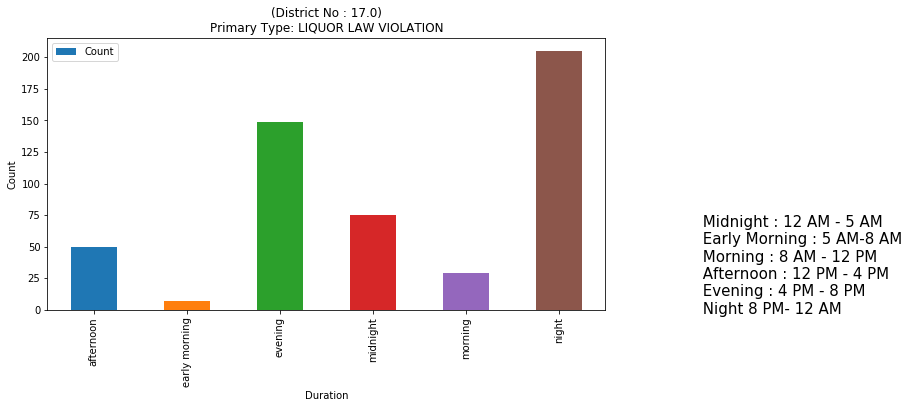

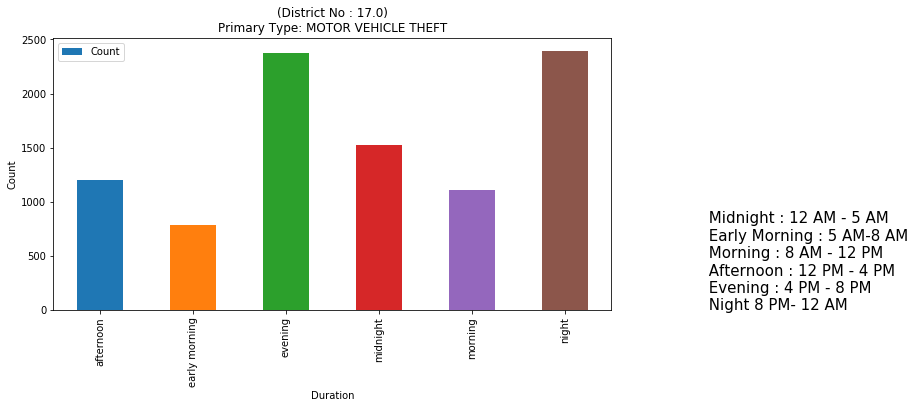

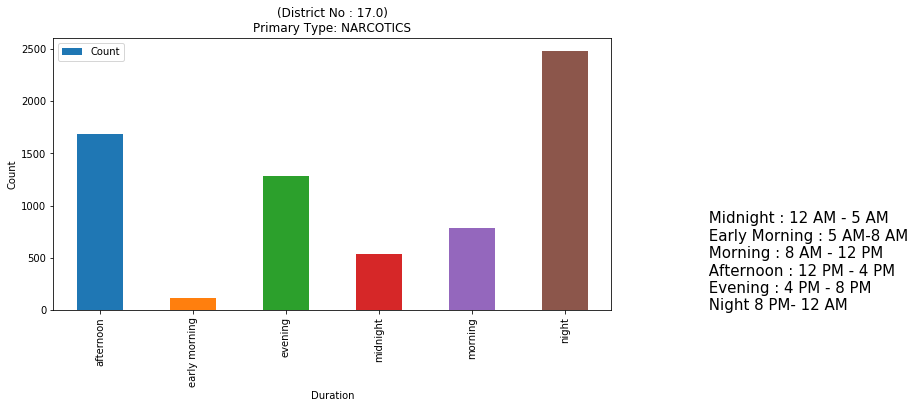

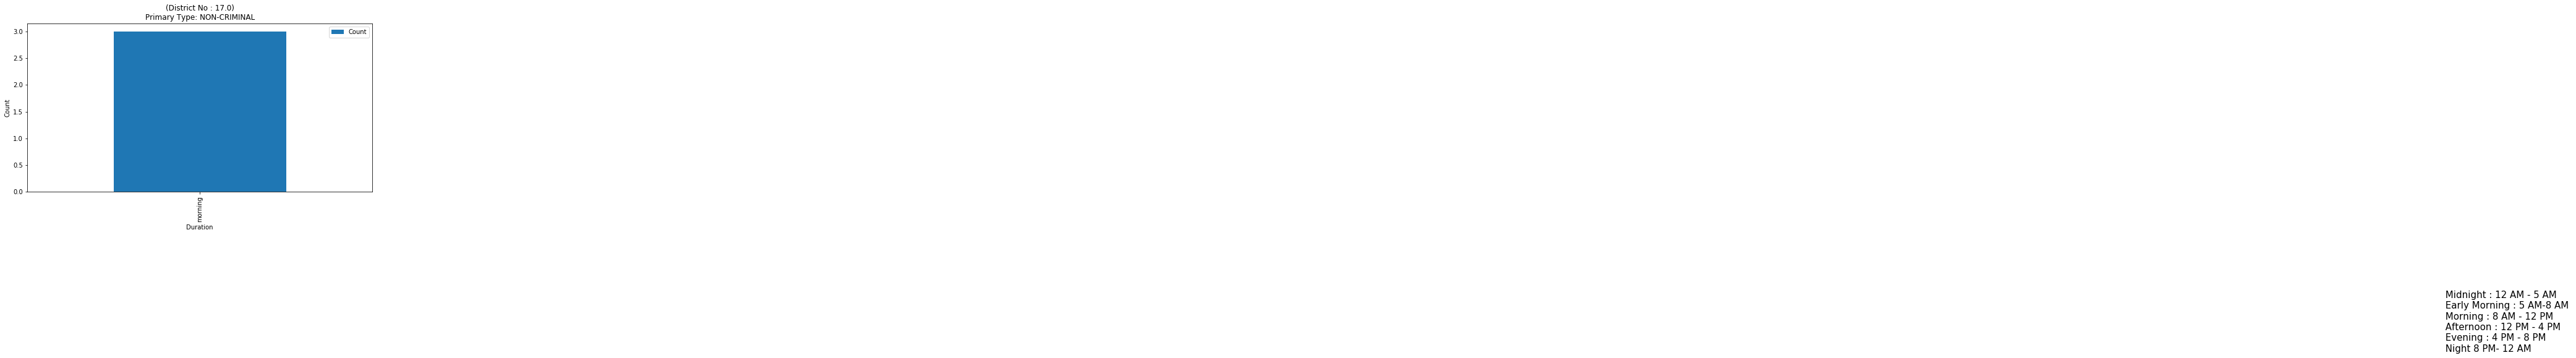

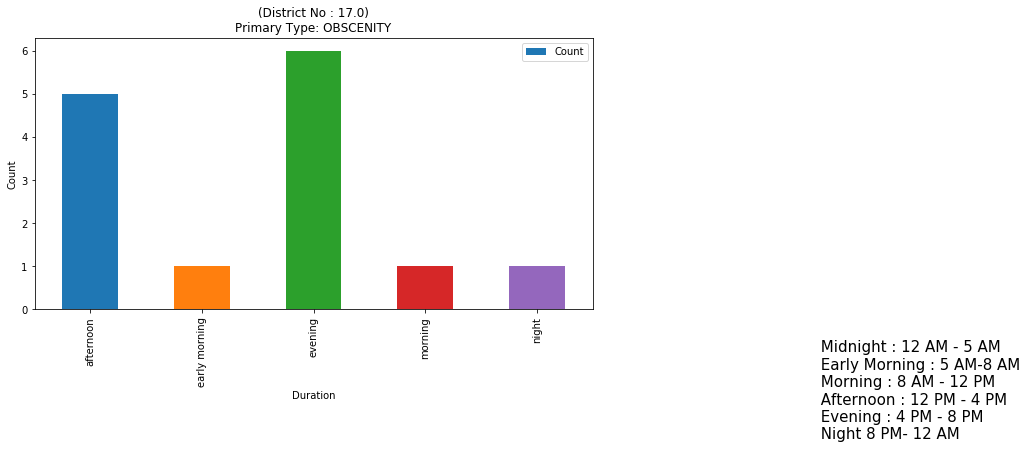

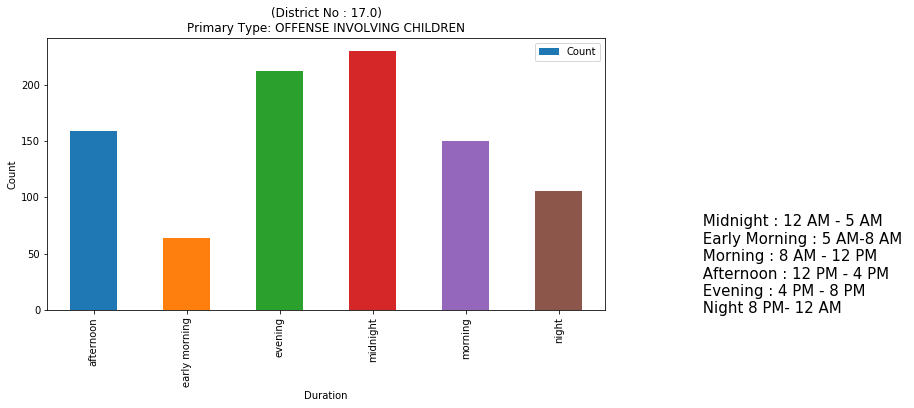

In [83]:
#duration and Primary type district wise

durPri=crimesTime.groupby(["District","Primary Type","Duration"])["ID"].count().reset_index().rename(columns={"ID":"Count"})
#print(durPri[["Count","Duration","District"]])
nPri=durPri["Primary Type"].unique()

#defining fn for plotting duration vs count in various district, Primary Type wise
def distPri(district):
    for i in range(10,20):
        durPri.loc[(durPri["District"]==district) & (durPri["Primary Type"]==nPri[i]),["Duration","Count"]].plot(x="Duration",y="Count",kind="bar",figsize=(10,5))
        plt.title("(District No : "+ str(district)+")"+"\n"+ "Primary Type: "+str(nPri[i]))
        plt.xlabel("Duration")
        plt.ylabel("Count")
        text=" Midnight : 12 AM - 5 AM \n Early Morning : 5 AM-8 AM \n Morning : 8 AM - 12 PM \n Afternoon : 12 PM - 4 PM \n Evening : 4 PM - 8 PM \n Night 8 PM- 12 AM"
        plt.text(6.5,-3,text,fontsize=15)

distPri(17.0)


In [6]:
years=crimes["Year"].unique()
print(years)

[2015 2014 2002 2008 2006 2004 2001 2005 2016 2017 2009 2012 2013 2018
 2003 2011 2007 2010]
